In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [35]:
import tensorflow as tf
import numpy as np

from tensorflow_hmm import hmm

In [71]:
x = np.arange(0, 100, 1)
truth = np.array((x / 10) % 2, dtype=float)
y = (truth + np.random.random(truth.shape) * 2.5)
y /= np.max(y)

In [72]:
y.shape

(100,)

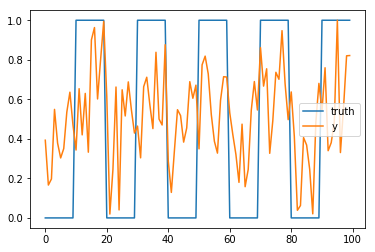

In [73]:
plot(truth, label='truth')
plot(y, label='y')
legend()

In [74]:
# hmm_tf = hmm.HMMTensorflow(np.array([[0.5, 0.5], [0.5, 0.5]]))
hmm_tf = hmm.HMMTensorflow(np.array([[0.9, 0.1], [0.1, 0.9]]))
hmm_np = hmm.HMMNumpy(np.array([[0.9, 0.1], [0.1, 0.9]]))

In [91]:
np.vstack([1-y,y]).T.shape

(100, 2)

In [93]:
lik(y).shape

(100, 2)

In [97]:
def lik(y):
    """ given 1d vector of likliehoods length N, return matrix with
    shape (N, 2) where (N, 0) is 1 - y and (N, 1) is y.

    This makes it easy to convert a time series of probabilities
    into 2 states, off/on, for a simple HMM.
    """

    return np.vstack([1 - y, y]).T

In [95]:
np_s, np_scores = hmm_np.viterbi_decode(lik(y))

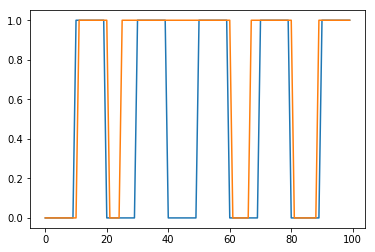

In [96]:
plot(truth)
plot(np_s)

In [78]:
tf_s_graph, tf_scores_graph = hmm_tf.viterbi_decode(lik(y), len(y))

tf_s = tf.Session().run(tf_s_graph)
tf_scores = [tf_scores_graph[0]]
tf_scores.extend([tf.Session().run(g) for g in tf_scores_graph[1:]])
print np.array(tf_scores)

[[ -1.19239089  -1.62706624]
 [ -1.47956684  -3.52672071]
 [ -1.80442684  -5.25622965]
 [ -2.70606219  -4.70667954]
 [ -3.28694184  -5.78374387]
 [ -3.75386324  -6.7821912 ]
 [ -4.29128001  -7.10390999]
 [ -5.16276227  -7.21900274]
 [ -6.27886972  -7.77683669]
 [ -7.02012423  -8.63607564]
 [ -7.5462175   -9.81019514]
 [ -8.71205383 -10.27389558]
 [ -9.36238671 -11.24641816]
 [-10.46161928 -11.8140375 ]
 [-10.97117073 -13.02056353]
 [-13.38637569 -13.23048121]
 [-16.7896302  -13.37350302]
 [-16.59684247 -13.98672444]
 [-17.91365049 -14.31153719]
 [-21.72572821 -14.42294234]
 [-17.67903138 -15.01506741]
 [-17.33744651 -19.05268449]
 [-17.72354878 -20.5654541 ]
 [-18.9142681  -20.43829217]
 [-19.06084353 -23.7531445 ]
 [-20.21090806 -21.79697833]
 [-21.04137105 -22.56452033]
 [-22.31176963 -23.04371763]
 [-23.21080183 -23.75088935]
 [-23.87683644 -24.7021384 ]
 [-24.60671097 -25.57433918]
 [-25.07438382 -26.87064088]
 [-26.26954486 -27.38590168]
 [-27.61845321 -27.83144439]
 [-28.57540926

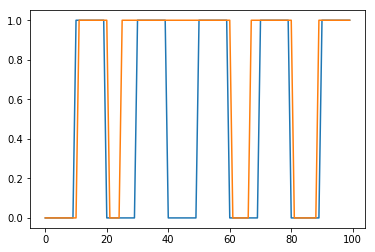

In [79]:
plot(truth)
plot(tf_s)

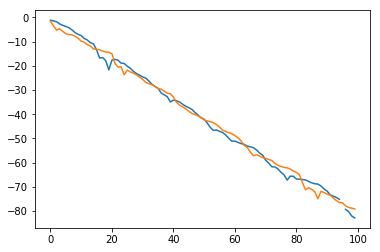

In [80]:
plot(tf_scores)

In [82]:
g_posterior, _, _ = hmm_tf.forward_backward(lik(y))

tf_posterior = np.concatenate(tf.Session().run(g_posterior))

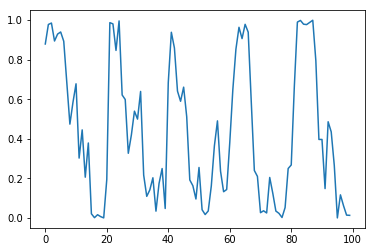

In [83]:
plot(tf_posterior[:,0])